In [216]:
import os
import io
import boto3
import pickle
import pandas as pd
from dotenv import load_dotenv
import numpy as np

import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

%matplotlib inline 
sns.set(color_codes=True)

pd.options.display.float_format = '{:,.2f}'.format

from os import listdir
from os.path import isfile, join

### Read data

In [13]:
mypath = '../data/stats'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles

['Seasons_Stats.csv', 'player_data.csv', 'Players.csv']

### Players

In [18]:
dfPlayers = pd.read_csv(mypath+'/Players.csv')
dfPlayers.shape

(3922, 8)

In [19]:
dfPlayers.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [20]:
for col in list(dfPlayers.columns):
    print(col)
    print(dfPlayers[col].value_counts())
    print('')

Unnamed: 0
0       1
3335    1
3339    1
1294    1
3343    1
       ..
2708    1
661     1
2712    1
665     1
2047    1
Name: Unnamed: 0, Length: 3922, dtype: int64

Player
George Lehmann      1
Tim Ohlbrecht       1
Andre McCarter      1
Randolph Keys       1
Dick Groat          1
                   ..
Aaron Gray          1
Ron Cavenall        1
Jack Smiley         1
Tommie Green        1
Shavlik Randolph    1
Name: Player, Length: 3921, dtype: int64

height
201.0    403
206.0    386
203.0    377
196.0    356
190.0    337
198.0    337
193.0    299
208.0    291
188.0    261
211.0    219
185.0    179
213.0    154
183.0    116
216.0     51
180.0     50
178.0     35
218.0     27
221.0     12
175.0      9
226.0      5
224.0      4
229.0      3
170.0      3
231.0      2
173.0      2
168.0      1
165.0      1
160.0      1
Name: height, dtype: int64

weight
83.0     291
95.0     281
86.0     273
99.0     262
97.0     223
        ... 
149.0      1
130.0      1
69.0       1
75.0       1
133.0 

In [55]:
dfPlayers = dfPlayers[['Player','height','weight','collage','born']].copy()

## Seasons_Stats

In [29]:
dfSeason = pd.read_csv(mypath+'/Seasons_Stats.csv').rename(columns={'Unnamed: 0':'index'})
dfSeason.shape

(24691, 53)

In [31]:
dfSeason.head()

,index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [32]:
for col in list(dfSeason.columns):
    print(col)
    print(dfSeason[col].value_counts())
    print('')

index
0        1
21760    1
9566     1
15709    1
13660    1
        ..
8865     1
10912    1
21151    1
23198    1
2047     1
Name: index, Length: 24691, dtype: int64

Year
2015.0    651
2011.0    625
2014.0    611
2008.0    595
2017.0    595
         ... 
1959.0    110
1955.0    109
1957.0    107
1956.0    106
1961.0    104
Name: Year, Length: 68, dtype: int64

Player
Eddie Johnson       33
Mike Dunleavy       32
Gerald Henderson    29
Nazr Mohammed       28
Kevin Willis        27
                    ..
Jay Williams         1
Lionel Chalmers      1
Frank Russell        1
Red Davis            1
Renaldo Major        1
Name: Player, Length: 3921, dtype: int64

Pos
PF       4966
SG       4811
C        4759
SF       4699
PG       4648
G         139
F         123
F-C        81
G-F        79
F-G        60
C-F        35
C-PF       33
SF-SG      30
PG-SG      28
SG-PG      27
PF-C       27
SG-SF      26
PF-SF      25
SF-PF      21
SG-PF       3
C-SF        2
SF-PG       1
PG-SF       1
Name: 

## player_data

In [64]:
dfPlay = pd.read_csv(mypath+'/player_data.csv').rename(columns={'Unnamed: 0':'index'})
dfPlay.shape

(4550, 8)

In [65]:
dfPlay.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [66]:
for col in list(dfPlay.columns):
    print(col)
    print(dfPlay[col].value_counts())
    print('')

name
Charles Jones       3
Charles Smith       3
George Johnson      3
Cedric Henderson    2
Mark Jones          2
                   ..
Sam Cassell         1
Mike Gminski        1
Gerard King         1
Darrun Hilliard     1
Travis Leslie       1
Name: name, Length: 4500, dtype: int64

year_start
1968    173
1947    161
1950    120
1971    100
1949     94
       ... 
1964     23
1966     23
1958     21
1961     20
1960     19
Name: year_start, Length: 72, dtype: int64

year_end
2018    471
2017    119
1950    102
1976     95
2005     88
       ... 
1956     17
1966     14
1959     14
1961     12
1967      6
Name: year_end, Length: 72, dtype: int64

position
G      1574
F      1290
C       502
F-C     388
G-F     360
C-F     219
F-G     216
Name: position, dtype: int64

height
6-7     473
6-8     426
6-9     424
6-5     418
6-6     403
6-3     401
6-4     340
6-2     327
6-10    324
6-1     229
6-11    229
7-0     164
6-0     150
5-11     61
7-1      52
5-10     48
7-2      26
5-9      

In [67]:
dfPlay = dfPlay[['name','year_start','year_end','position']].copy()

### Merge players 

In [48]:
names = list(set(dfPlay['name'].map(lambda x: str(x).lower())))
len(names)

4500

In [49]:
names2 = list(set(dfPlayers['Player'].map(lambda x: str(x).lower())))
len(names2)

3922

In [50]:
names3 = list(set(dfSeason['Player'].map(lambda x: str(x).lower())))
len(names3)

3922

In [59]:
print(len(dfSeason))
df = dfSeason.merge(dfPlayers, how = 'left', left_on = 'Player', right_on = 'Player')
print(len(df))

24691
24691


In [68]:
dfPlay['Year'] = dfPlay.apply(lambda x: list(range(x['year_start'],x['year_end']+1)),axis=1)
dfPlay = dfPlay.explode('Year').reset_index(drop=True)
dfPlay.head()

,name,year_start,year_end,position,Year
0,Alaa Abdelnaby,1991,1995,F-C,1991
1,Alaa Abdelnaby,1991,1995,F-C,1992
2,Alaa Abdelnaby,1991,1995,F-C,1993
3,Alaa Abdelnaby,1991,1995,F-C,1994
4,Alaa Abdelnaby,1991,1995,F-C,1995


In [89]:
dfPlay = dfPlay.drop_duplicates(['name','Year'],keep='first').copy()
print(len(df))
df2 = df.merge(dfPlay, how = 'left', left_on = ['Player','Year'], right_on = ['name','Year'])
print(len(df2))

24691
24691


In [90]:
df2.head()

,index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,PF,PTS,height,weight,collage,born,name,year_start,year_end,position
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,217.0,458.0,180.0,77.0,Indiana University,1918.0,Curly Armstrong,1949.0,1951.0,G-F
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,99.0,279.0,188.0,83.0,University of Kentucky,1921.0,Cliff Barker,1950.0,1952.0,G
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,192.0,438.0,193.0,86.0,University of Notre Dame,1924.0,Leo Barnhorst,1950.0,1954.0,F-G
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,29.0,63.0,196.0,88.0,North Carolina State University,1925.0,Ed Bartels,1950.0,1951.0,F
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,27.0,59.0,196.0,88.0,North Carolina State University,1925.0,Ed Bartels,1950.0,1951.0,F


<AxesSubplot:xlabel='Year'>

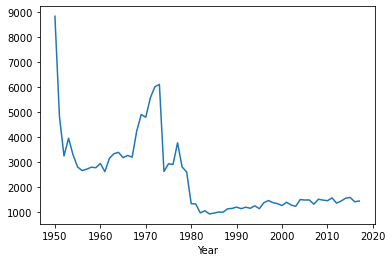

In [106]:
df2[df2.columns.difference(['Year'])].isnull().groupby(df2.Year).sum().astype(int).T.sum().plot()

In [111]:
df2['first'] = df2.groupby('Player')['Year'].transform(min)
df2['last']  = df2.groupby('Player')['Year'].transform(max)
df2['second'] = df2['first'] + 1

In [112]:
df2['rookie'] = np.where(df2['first']==df2['Year'],1,0)
df2['sophomore'] = np.where(df2['second']==df2['Year'],1,0)

In [189]:
df2['HoF'] = df['Player'].map(lambda x: 1 if '*' in str(x) else 0)
df2['Player'] = df2['Player'].str.replace('*', '', regex=True)
df2['Player'] = df2['Player'].str.replace("'", '', regex=True)


#### Alls Stars

In [115]:
dfAll = pd.read_csv('../data/basketball/basketball_player_allstar.csv')
dfHoF = pd.read_csv('../data/basketball/basketball_hof.csv')

In [164]:
dfAll.head()

,player_id,last_name,first_name,season_id,conference,league_id,games_played,minutes,points,o_rebounds,...,steals,blocks,turnovers,personal_fouls,fg_attempted,fg_made,ft_attempted,ft_made,three_attempted,three_made
0,abdulka01,Abdul-Jabbar,Kareem,1978,West,NBA,1,28,11.0,NaN,...,NaN,NaN,NaN,NaN,12.0,5.0,2.0,1.0,NaN,NaN
1,abdulka01,Abdul-Jabbar,Kareem,1969,East,NBA,1,18,10.0,NaN,...,NaN,NaN,NaN,NaN,8.0,4.0,2.0,2.0,NaN,NaN
2,abdulka01,Abdul-Jabbar,Kareem,1988,West,NBA,1,13,4.0,NaN,...,NaN,NaN,NaN,NaN,6.0,1.0,2.0,2.0,NaN,NaN
3,abdulka01,Abdul-Jabbar,Kareem,1987,West,NBA,1,14,10.0,NaN,...,NaN,NaN,NaN,NaN,9.0,4.0,2.0,2.0,NaN,NaN
4,abdulka01,Abdul-Jabbar,Kareem,1986,West,NBA,1,27,10.0,NaN,...,NaN,NaN,NaN,NaN,9.0,4.0,2.0,2.0,NaN,NaN


In [173]:
dfAll['Player'] = dfAll['first_name'] + ' ' + dfAll['last_name']
dfAll['Player'] = dfAll['Player'].map(lambda x: x.lower())
dfAll['AllStar'] = 1

In [177]:
dfAll.drop_duplicates('Player').shape

(455, 25)

In [192]:
dfAll['Player'] = dfAll['Player'].str.replace("'", '', regex=True)

alls = list(set(dfAll['Player']))
names = list(set(df2['Player']))

In [203]:
print(len(df2))
df3 = df2.merge(dfAll[['Player','season_id','AllStar']].rename(columns={'season_id':'Year'}), how = 'left', on = ['Player','Year'])
print(len(df3))

24691
24691


In [204]:
df3['AllStar'].fillna(0).value_counts()

0.0    23349
1.0     1342
Name: AllStar, dtype: int64

In [205]:
df3['AllStarTimes'] = df3.groupby('Player')['AllStar'].transform(sum)

In [207]:
df3['AllStarPlayer'] = np.where(df3['AllStarTimes']>0,1,0)

In [209]:
dfRookie = df3[df3['rookie']==1].copy()

In [211]:
dfRookie['AllStarPlayer'].value_counts()

0    4135
1     366
Name: AllStarPlayer, dtype: int64

In [218]:
dfRookie['HoF'].value_counts()

0    4370
1     131
Name: HoF, dtype: int64

In [233]:
df3.columns

Index(['index', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM',
       'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'height', 'weight', 'collage', 'born',
       'name', 'year_start', 'year_end', 'position', 'first', 'last', 'second',
       'rookie', 'sophomore', 'HoF', 'AllStar', 'AllStarTimes',
       'AllStarPlayer'],
      dtype='object')

In [221]:
df3[['PER','PTS','PF','MP']].head(2)

,PER,PTS,PF,MP
0,NaN,458.00,217.00,NaN
1,NaN,279.00,99.00,NaN


In [ ]:
dfRookie['PPM'] = dfRookie['PTS']/dfRookie['MP']

<AxesSubplot:xlabel='position', ylabel='height'>

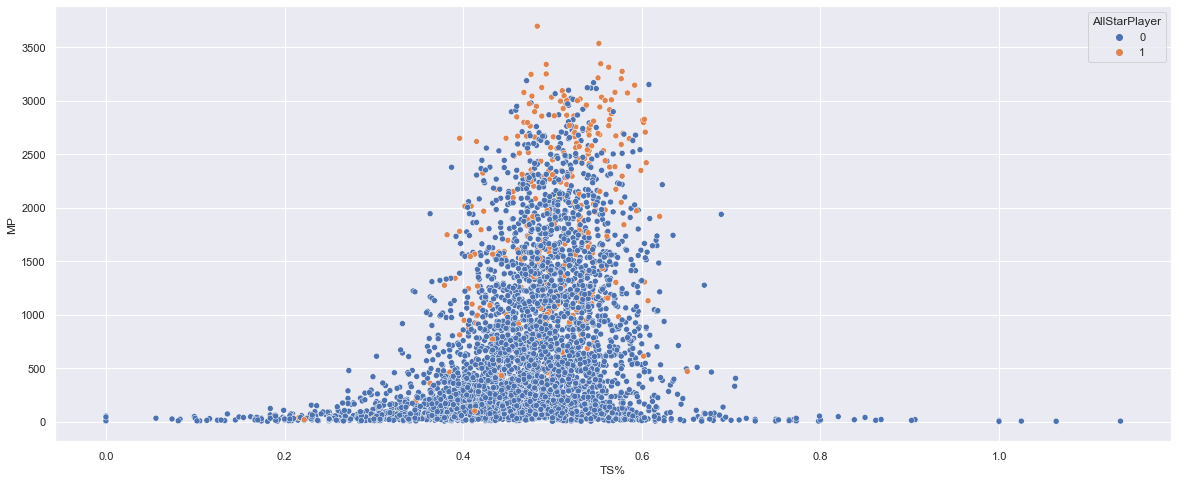

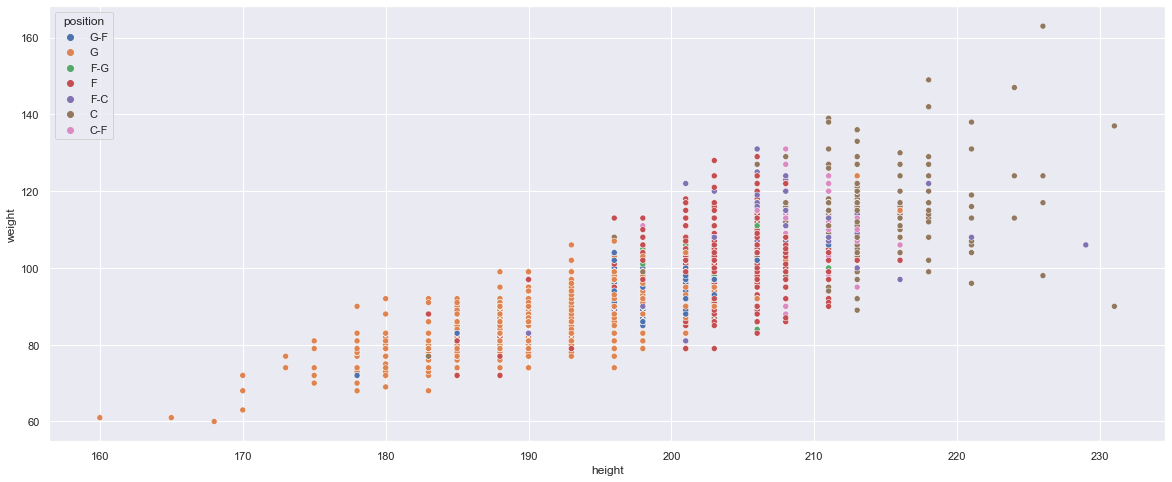

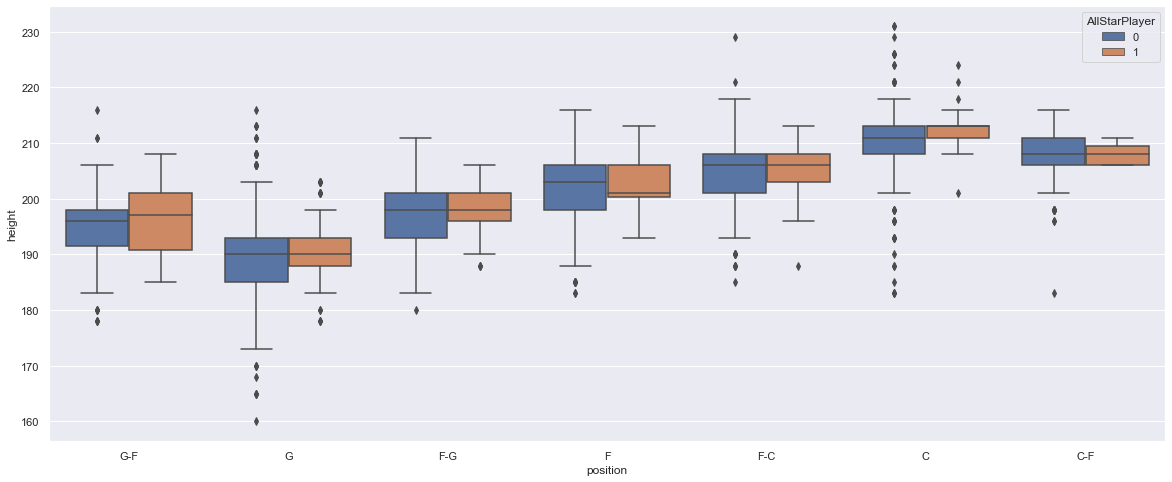

In [239]:
fig = plt.figure(figsize=(20,8))
sns.scatterplot(data = dfRookie, x = 'TS%', y = 'MP', hue = 'AllStarPlayer')
fig = plt.figure(figsize=(20,8))
sns.scatterplot(data = dfRookie, x = 'height', y = 'weight', hue = 'position')
fig = plt.figure(figsize=(20,8))
sns.boxplot(data = dfRookie, x = 'position', y = 'height', hue = 'AllStarPlayer')

<AxesSubplot:xlabel='position', ylabel='PPM'>

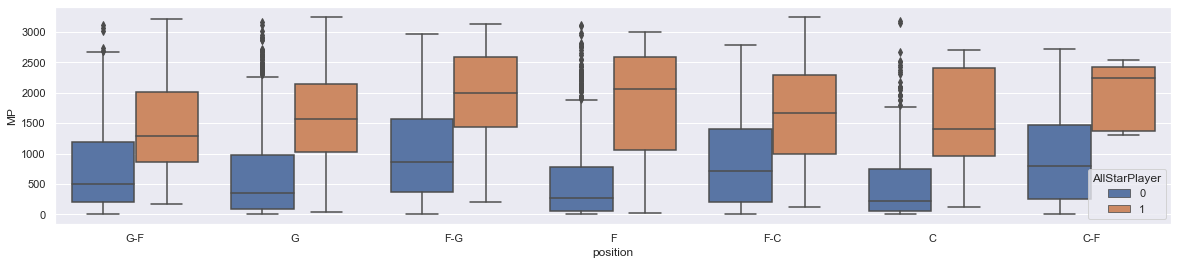

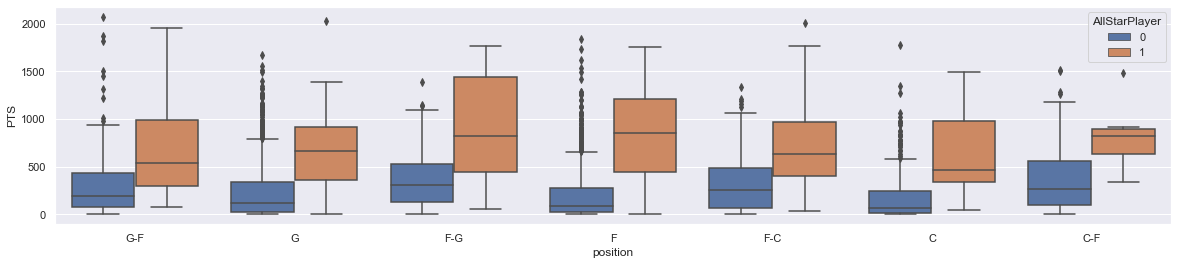

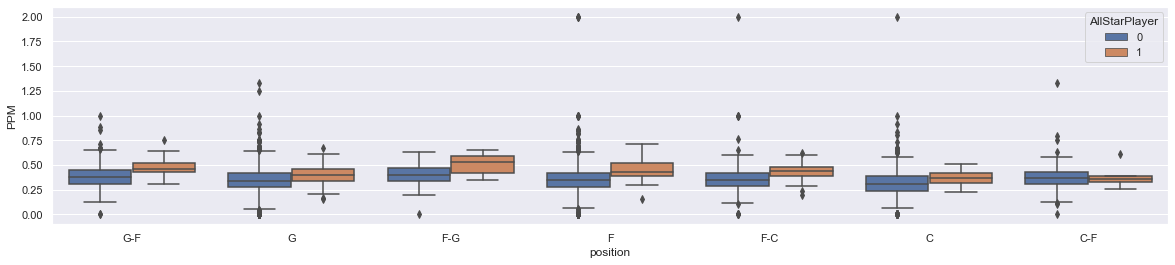

In [231]:
fig = plt.figure(figsize=(20,4))
sns.boxplot(data = dfRookie, x = 'position', y = 'MP', hue = 'AllStarPlayer')
fig = plt.figure(figsize=(20,4))
sns.boxplot(data = dfRookie, x = 'position', y = 'PTS', hue = 'AllStarPlayer')
fig = plt.figure(figsize=(20,4))
sns.boxplot(data = dfRookie, x = 'position', y = 'PPM', hue = 'AllStarPlayer')
fig = plt.figure(figsize=(20,4))
sns.boxplot(data = dfRookie, x = 'position', y = 'PPM', hue = 'AllStarPlayer')




<AxesSubplot:xlabel='position', ylabel='FG%'>

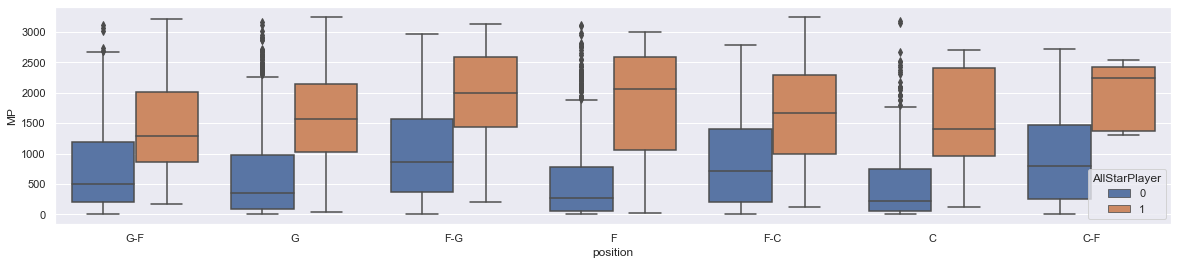

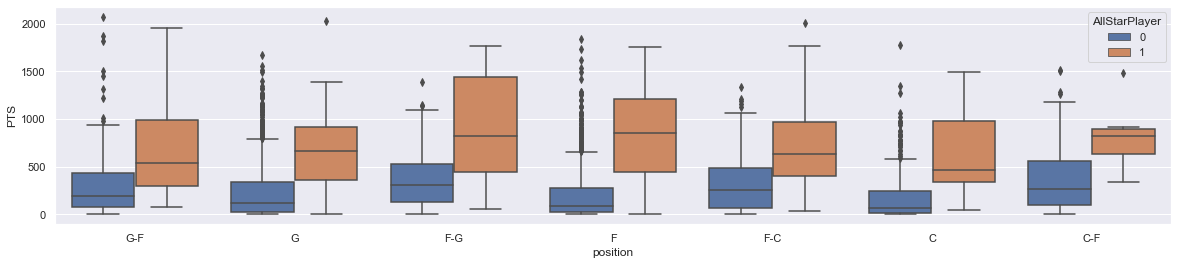

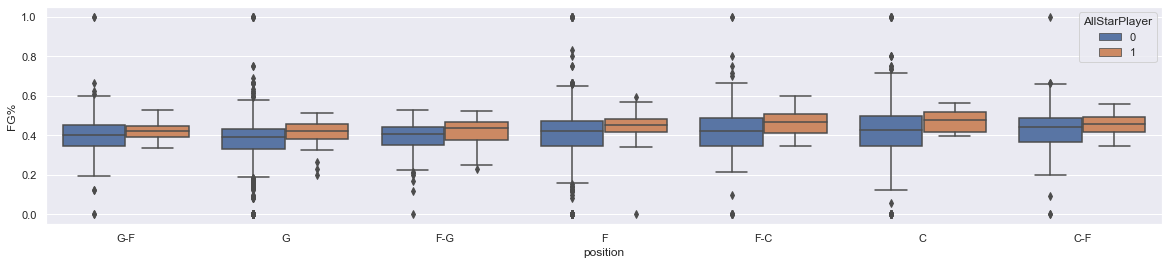

In [236]:
fig = plt.figure(figsize=(20,4))
sns.boxplot(data = dfRookie, x = 'position', y = 'MP', hue = 'AllStarPlayer')
fig = plt.figure(figsize=(20,4))
sns.boxplot(data = dfRookie, x = 'position', y = 'PTS', hue = 'AllStarPlayer')
fig = plt.figure(figsize=(20,4))
sns.boxplot(data = dfRookie, x = 'position', y = 'FG%', hue = 'AllStarPlayer')


In [241]:
dfRookie['AllStar'] = dfRookie['AllStar'].fillna(0)

In [243]:
dfRookie.isna().sum().sort_values(ascending=False)

blank2    4501
blanl     4501
3P%       2307
GS        1698
3PAr      1583
          ... 
Tm           0
AST          0
2PA          0
G            0
index        0
Length: 71, dtype: int64

<AxesSubplot:xlabel='Tm'>

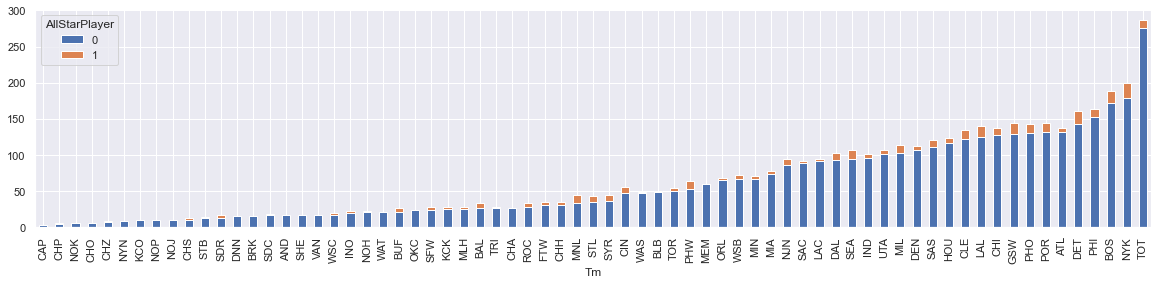

In [253]:
pd.crosstab(dfRookie['Tm'],dfRookie['AllStarPlayer']).sort_values(0).plot(kind='bar',stacked=True,figsize=(20,4))

<AxesSubplot:xlabel='position', ylabel='Age'>

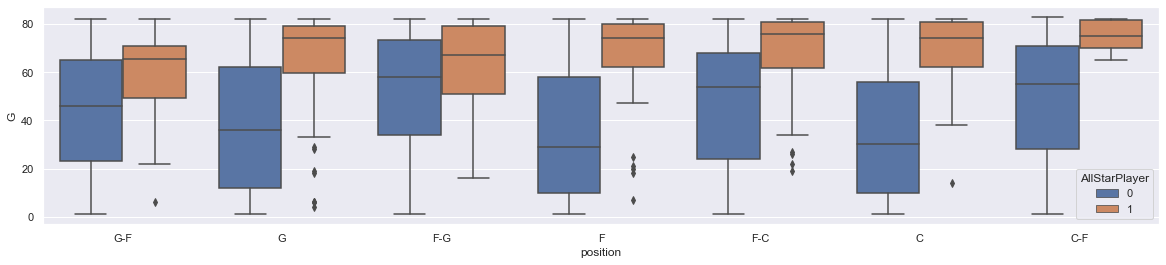

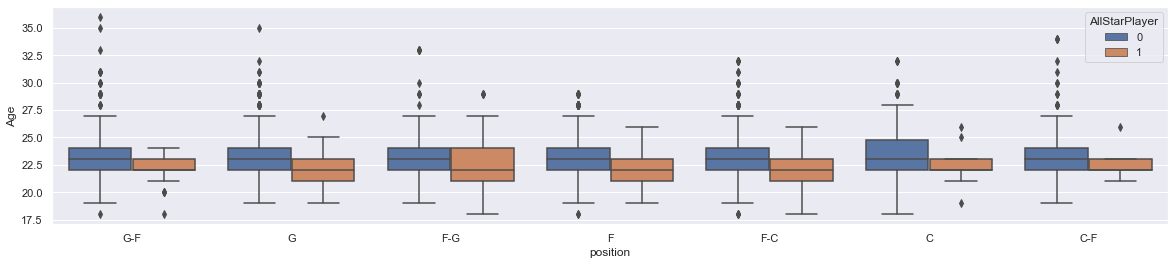

In [256]:
fig = plt.figure(figsize=(20,4))
sns.boxplot(data = dfRookie, x = 'position', y = 'G', hue = 'AllStarPlayer')
fig = plt.figure(figsize=(20,4))
sns.boxplot(data = dfRookie, x = 'position', y = 'Age', hue = 'AllStarPlayer')




In [260]:
df3.columns

Index(['index', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM',
       'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'height', 'weight', 'collage', 'born',
       'name', 'year_start', 'year_end', 'position', 'first', 'last', 'second',
       'rookie', 'sophomore', 'HoF', 'AllStar', 'AllStarTimes',
       'AllStarPlayer', 'C-F', 'F', 'F-C', 'F-G', 'G', 'G-F'],
      dtype='object')

In [284]:
result = ['Age','G','GS','MP','PER','FG%','WS/48','pos_C', 'pos_C-F', 'pos_F', 'pos_F-C',
       'pos_F-G', 'pos_G', 'pos_G-F']

In [285]:
import statsmodels.api as sm

from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE

data = dfRookie.fillna(0)

categorical = ['position']
for var in categorical:
    data = pd.concat((
                    data,
                    pd.get_dummies(data[var], drop_first=True,prefix='pos')), axis=1)
    
#result = initial
col = ['AllStarPlayer'] + result
train_x, test_x, train_y, test_y = train_test_split(data[col[1:]],
                                                        data[col[0]], train_size=0.7)


train = pd.concat([train_x,train_y],axis=1).reset_index()
test = pd.concat([test_x,test_y],axis=1).reset_index()

train_x = sm.add_constant(train_x)
test_x = sm.add_constant(test_x)

over = SMOTE()
#over = RandomOverSampler()
# aplicación del método

X_train_over, y_train_over = over.fit_resample(train_x, train_y)
#X_train_over, y_train_over = sample(train_x, train_y)


# contamos la cantidad de observaciones por clase
print(f"BASELINE: {Counter(train_y)}")
print(f"OVER    : {Counter(y_train_over)}")


model = sm.Logit(y_train_over,X_train_over).fit(method='bfgs')

model.summary()

BASELINE: Counter({0: 2889, 1: 261})
OVER    : Counter({0: 2889, 1: 2889})
         Current function value: 0.225732
         Iterations: 35
         Function evaluations: 46
         Gradient evaluations: 39


/Users/angarr/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1796: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/angarr/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1849: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/angarr/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1796: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/angarr/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1849: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/angarr/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          AllStarPlayer   No. Observations:                 5778
Model:                          Logit   Df Residuals:                     5763
Method:                           MLE   Df Model:                           14
Date:                Sat, 26 Jun 2021   Pseudo R-squ.:                  0.6743
Time:                        18:16:32   Log-Likelihood:                -1304.3
converged:                      False   LL-Null:                       -4005.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4324      0.812      0.532      0.595      -1.160       2.025
Age            0.0597      0.028      2.150      0.032       0.005       0.114
G              0.0213      0.004      5.266      0.000       0.013       0.029
GS             0.0039      0.003      1.321      0.186      -0.002       0.010
MP             0.0006      0.000      4.797      0.000       0.000       0.001
PER            0.0406      0.020      2.043      0.041       0.002       0.080
FG%           -0.6345      0.960     -0.661      0.509      -2.516       1.247
WS/48          0.4627      1.286      0.360      0.719      -2.057       2.982
pos_C         -7.2381      0.391    -18.514      0.000      -8.004      -6.472
pos_C-F       -6.4385      0.348    -18.483      0.000      -7.121      -5.756
pos_F         -5.9965      0.208    -28.869      0.000      -6.404      -5.589
pos_F-C       -4.8346      0.212    -22.808      0.000      -5.250      -4.419
pos_F-G       -5.0918      0.273    -18.686      0.000      -5.626      -4.558
pos_G         -5.2639      0.184    -28.650      0.000      -5.624      -4.904
pos_G-F       -5.8679      0.275    -21.333      0.000      -6.407      -5.329
==============================================================================
"""

Area under the ROC curve : 0.848108
Threshold : 0.17


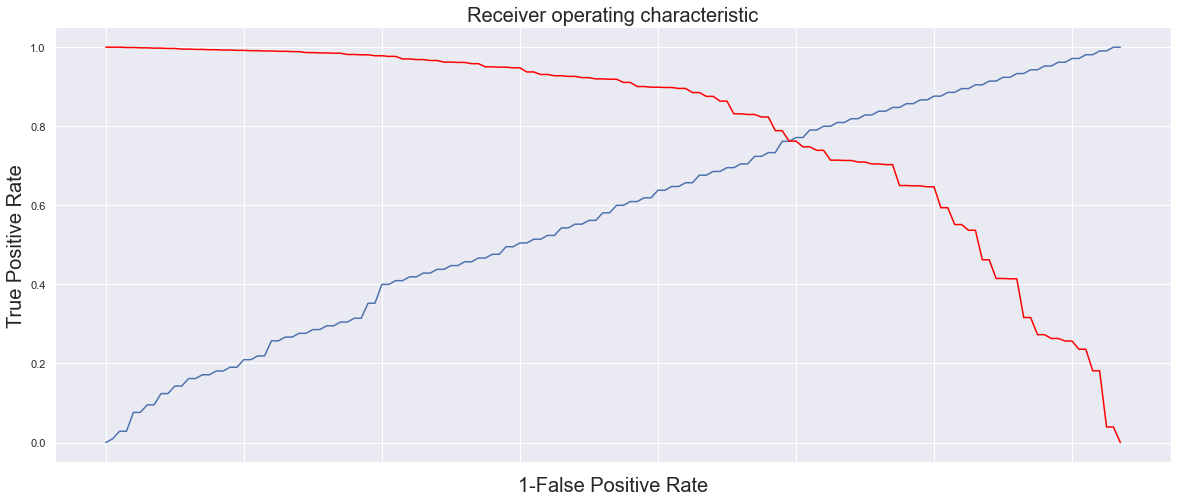

In [289]:
# Add prediction probability to dataframe
train['pred_proba'] = model.predict(sm.add_constant(train[result]))
test['pred_proba'] = model.predict(sm.add_constant(test[result]))

data['pred_proba'] = model.predict(sm.add_constant(data[result]))



# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(test['AllStarPlayer'], test['pred_proba'],plot_roc=True)
print(f"Threshold : {round(threshold[0],2)}")
# [0.31762762459360921]

In [290]:
from sklearn.metrics import (confusion_matrix,  
                           accuracy_score)
classes=2
if classes == 3:
    thres = (threshold[0],threshold[0])
    test['pred'] = test['pred_proba'].map(lambda x: 0 if x < threshold[0] else 1 if x>=threshold[1] else 2)

if classes ==2:
    test['pred'] = test['pred_proba'].map(lambda x: 0 if x < threshold[0] else 1)

print(f"Accuracy: {round(accuracy_score(test['AllStarPlayer'], test['pred']),3):,}")
print(f"Accuracy: {round(accuracy_score(test['AllStarPlayer'], test['pred']),3):,}")

cm = pd.DataFrame(confusion_matrix(test['AllStarPlayer'], test['pred']))
cm

Accuracy: 0.762
Accuracy: 0.762


,0,1
0,950,296
1,25,80


In [293]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(test['AllStarPlayer'],test['pred'])
print('precision: {}'.format(precision[0]))
print('recall: {}'.format(recall[0]))
print('fscore: {}'.format(fscore[0]))
print('support: {}'.format(support[0]))

precision: 0.9743589743589743
recall: 0.7624398073836276
fscore: 0.8554705087798288
support: 1246


In [287]:
def Find_Optimal_Cutoff(target, predicted,plot_roc=False):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value
        
    """ 
    
    fpr, tpr, threshold = roc_curve(target, predicted)
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)

    i = np.arange(len(tpr)) # index for df
    roc = pd.DataFrame({'fpr' : pd.Series(fpr),'tpr' : pd.Series(tpr), '1-fpr' : pd.Series(1-fpr), 'tf' : pd.Series(tpr - (1-fpr)), 'thresholds' : pd.Series(threshold)})
    roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    if plot_roc==True:

        # Plot tpr vs 1-fpr
        fig, ax = plt.subplots(figsize = (20,8))
        plt.plot(tpr)
        plt.plot(1-fpr, color = 'red')
        plt.xlabel('1-False Positive Rate',fontsize=20)
        plt.ylabel('True Positive Rate',fontsize=20)
        plt.title('Receiver operating characteristic',fontsize=20)
        ax.set_xticklabels([])
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

In [295]:
test['pred_proba']

0      0.01
1      0.01
2      0.17
3      0.25
4      0.17
       ... 
1346   0.08
1347   0.04
1348   0.01
1349   0.02
1350   0.08
Name: pred_proba, Length: 1351, dtype: float64

In [296]:
def plot_hist(df,var,hue=False,lvl = False,include = True,bins=100,figsize=(20,8),kde=False,order = False,title=False,fontsize=25):

    #Visualiza histogramas de variables numéricas o categoricas segun formato
    
    if (df[var].dtype == 'int64') | (df[var].dtype == 'float64'):
        
    
        if lvl == False:
            lvl_u = df[var].max(skipna=True)
            lvl_d = df[var].min(skipna=True)
        else: 
            lvl_u = lvl[1]
            lvl_d = lvl[0]

        if include == True:
            mask = (df[var]>=lvl_d) & (df[var]<=lvl_u)
        else:
            mask = (df[var]>=lvl_d) & (df[var]<=lvl_u)

        print(f"Exluidos {len(df[~mask])/len(df)*100} % de los registros")    

        if hue==False:
            plt.figure(figsize=figsize)
            chart=sns.distplot(df[var][mask], kde=kde, bins=bins)
            if title==False:
                plt.title(f'Distribución de {var}', fontsize=fontsize)
            else:
                plt.title(f'{title}', fontsize=fontsize)
            chart.tick_params(axis = 'both', which = 'major', labelsize = fontsize*0.7)
        
        else:
            fig, ax = plt.subplots(figsize=figsize)
            cat = list(set(df[hue][df[hue].notnull()]))
            current_palette = sns.color_palette()
            colors = current_palette[:len(cat)]
            for idx,c in enumerate(cat):
                sns.distplot(df[(df[hue]==c) & mask][var], kde=kde, label=c, color=colors[idx], bins=bins,ax=ax)
            if title==False:
                plt.title(f'Distribución de {var}', fontsize=fontsize)
            else:
                plt.title(f'{title}', fontsize=fontsize)
            plt.legend(prop={'size': fontsize})
            ax.tick_params(axis = 'both', which = 'major', labelsize = fontsize*0.7)
    
        plt.xlabel(f'{var}', fontsize=fontsize)
        plt.ylabel('Frecuencia', fontsize=fontsize)
        
    elif df[var].dtype =='O':
        
        plt.figure(figsize=figsize)
        if hue ==False:
            
            if order ==False:
                chart = sns.countplot(x=var, data=df)
            else:
                order = df[var].value_counts().index
                chart=sns.countplot(x=var, data=df,palette="pastel",order = order)
            if title==False:
                plt.title(f'Distribución de {var}', fontsize=fontsize)
            else:
                plt.title(f'{title}', fontsize=fontsize)            
        else:
            if order ==False:
                chart=sns.countplot(x=var,hue=hue, data=df)
            else:
                order = df[var].value_counts().index
                chart=sns.countplot(x=var,hue=hue, data=df,order = order,palette="pastel")
            
            if title==False:
                plt.title(f'Distribución de {var}', fontsize=fontsize)
            else:
                plt.title(f'{title}', fontsize=fontsize)
            plt.legend(prop={'size': fontsize})
            
        chart.set_xticklabels(
            chart.get_xticklabels(), 
            rotation=45, 
            horizontalalignment='right',
            fontweight='light',
            fontsize=fontsize
        )
        chart.tick_params(axis = 'y', which = 'major', labelsize = fontsize*0.7)
        chart.tick_params(axis = 'y', which = 'minor', labelsize = fontsize*0.5)
        plt.xlabel(f'{var}', fontsize=fontsize)
        plt.ylabel('Frecuencia', fontsize=fontsize)

Exluidos 0.0 % de los registros


/Users/angarr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/angarr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


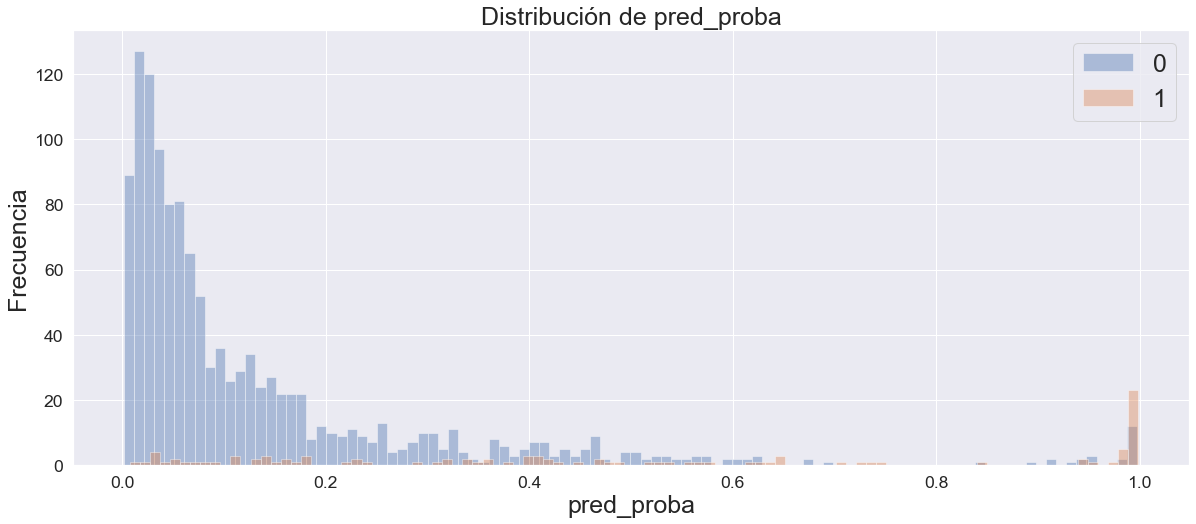

In [297]:
plot_hist(test,'pred_proba','AllStarPlayer')

In [338]:
var1 = 'pred_proba'
var2 = 'AllStarPlayer'
normalize=True
aux=test
cuts=5
lvl_d= 0
lvl_u=1

aux.set_index(pd.cut(aux[var1], np.linspace(lvl_d, lvl_u, cuts)), inplace=True)
a = aux.groupby([aux.index, var2]).size()
if normalize==True:
    b = aux.groupby(aux.index)[var2].count()
    aux = a.div(b, axis=0,level=0)
    freq= 'Frecuencia relativa'
else:
    freq='Frecuencia'
    aux=a


<AxesSubplot:xlabel='pred_proba'>

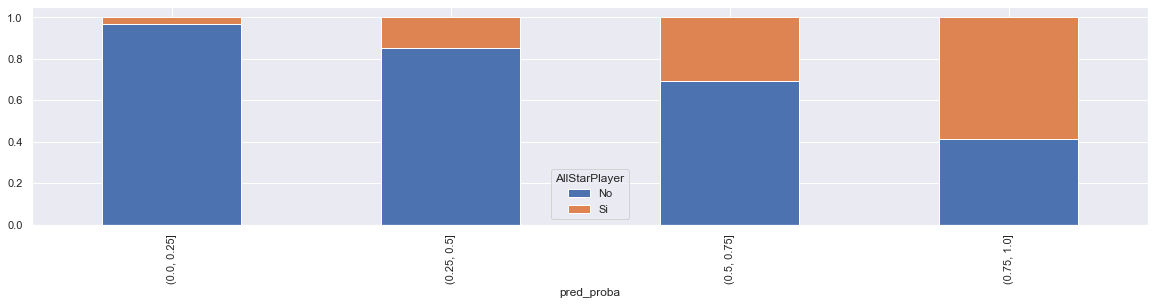

In [339]:
t = aux.unstack().rename(columns={0:'No',1:'Si'})
t = t.reset_index()[['pred_proba','No','Si']]
t['pred_proba'] = t['pred_proba'].astype(str)
t.set_index('pred_proba').plot(kind='bar',stacked=True,figsize=(20,4))

In [298]:
def plot_cut(df,var1,var2,cuts=False,lvl=False,figsize=(20,8),fontsize=20,normalize=True,stacked=True,kind='bar',title=False):

    #Visualiza variables nuemricas en cortes
    
    if lvl == False:
        lvl_u = max(df[var1])
        lvl_d = min(df[var1])
    else: 
        lvl_u = lvl[1]
        lvl_d = lvl[0]
        
    mask = (df[var1]>=lvl_d) & (df[var1]<=lvl_u)    
    print(f"Exluidos {len(df[~mask])/len(df)*100} % de los registros")    

    aux=df[mask]
    
    if cuts==False:
        cuts=len(aux[var1].value_counts())
    aux.set_index(pd.cut(aux[var1], np.linspace(lvl_d, lvl_u, cuts)), inplace=True)
    a = aux.groupby([aux.index, var2]).size()
    if normalize==True:
        b = aux.groupby(aux.index)[var2].count()
        aux = a.div(b, axis=0,level=0)
        freq= 'Frecuencia relativa'
    else:
        freq='Frecuencia'
        aux=a
    ax = aux.unstack().plot.bar(stacked=stacked, figsize = figsize)
            
    if kind=='barh':
        ax.set_xlabel(f"{freq}", fontsize=fontsize)
        ax.set_ylabel(f"{var1}", fontsize=fontsize)
    else:
        ax.set_xlabel(f"{var1}", fontsize=fontsize)
        ax.set_ylabel(f"{freq}", fontsize=fontsize)
    if title == False:
        ax.set_title(f"{var1} por {var2}", fontsize=fontsize)
    else:
        ax.set_title(f"{title}", fontsize=fontsize)
    ax.tick_params(axis = 'both', which = 'major', labelsize = fontsize*0.7,rotation=70)

def plot_cross(df,var1,var2=False,normalize=False,figsize=(20,8),stacked=True,kind='bar',fontsize=20, title = False,order = False):

    #Visualiza croostaabs
    
    if normalize:
        ct = pd.crosstab(df[var1],df[var2],normalize='index')
        if order == False:
            ax = ct.plot(kind=kind,stacked=stacked,figsize=figsize)
        else: 
            ax = ct[order].plot(kind=kind,stacked=stacked,figsize=figsize)
        freq = "Frecuencia relativa"
    else: 
        ct = pd.crosstab(df[var1],df[var2])
        if order == False:
            ax = ct.plot(kind=kind,stacked=stacked,figsize=figsize)
        else:
            ax = ct[order].plot(kind=kind,stacked=stacked,figsize=figsize)
        freq = "Frecuencia"

        
    if kind=='barh':
        ax.set_xlabel(f"{freq}", fontsize=fontsize)
        ax.set_ylabel(f"{var1}", fontsize=fontsize)
    else:
        ax.set_xlabel(f"{var1}", fontsize=fontsize)
        ax.set_ylabel(f"{freq}", fontsize=fontsize)
    if title == False:
        ax.set_title(f"{var1} por {var2}", fontsize=fontsize)
    else:
        ax.set_title(f"{title}", fontsize=fontsize)


    ax.tick_params(axis='both', which='major', labelsize=20, rotation=70)
